Caroline Petersen - GEOG312

# Introduction 

This project explores the patterns of bees within Knox County over the past 10 years. The maps provided attempt to examine the influx of bee species as well as where in the county they locate to the most.

# Data

Data was collected from the Global Biodiversity Information Facility. Initial data cleaning was done in ArcGIS pro to extract Knox County records. Once bee observations were located to this area, final cleaning was done within Jupyter notebook. This data set was chosen because it was contained in-depth records of all known bee species and their given observations from both human reports as well as from scientific organizations. 

# Methodology & Code

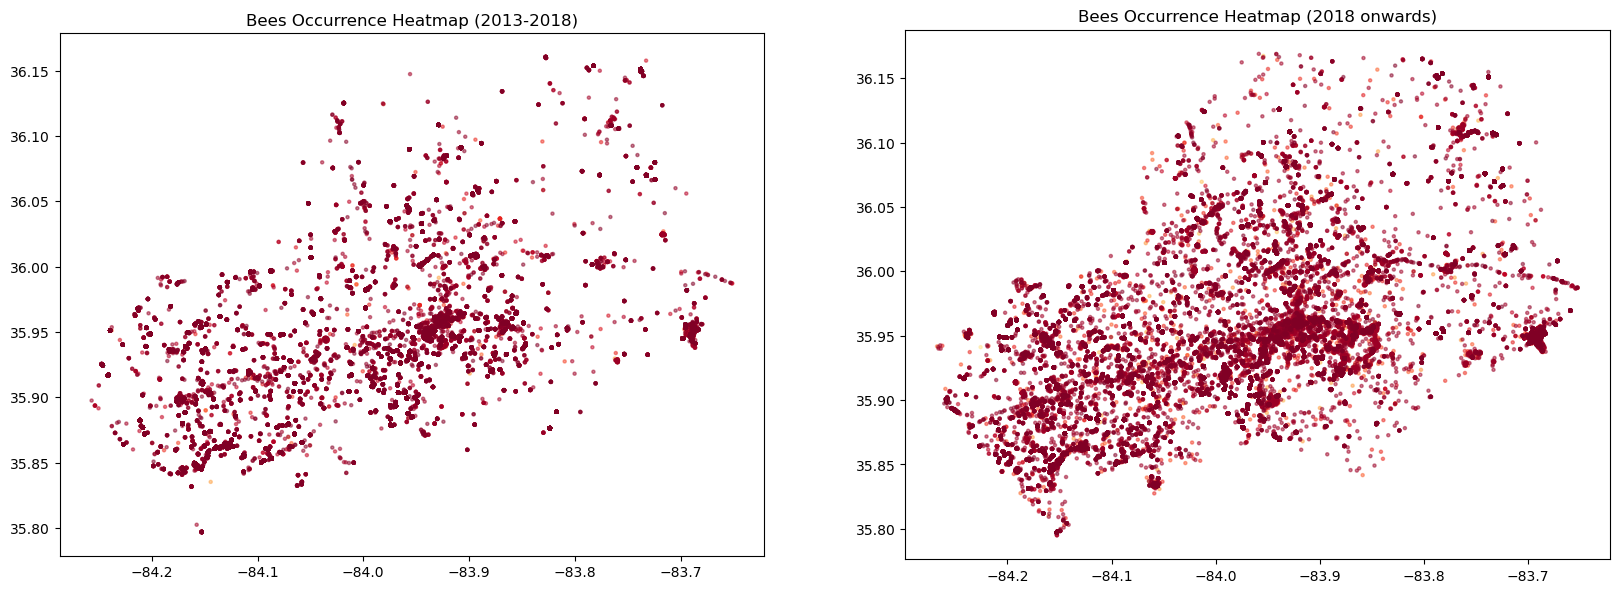

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

bees = pd.read_csv("bees.csv", dtype='str', low_memory=False)

columns_to_drop = [
    'datasetKey',
    'occurrenceID',
    'kingdom',
    'phylum',
    'class',
    'order_',
    'family',
    'genus',
    'infraspecificEpithet',
    'taxonRank',
    'scientificName',
    'verbatimScientificNameAuthorship',
    'publishingOrgKey',
    'elevation',
    'elevationAccuracy',
    'depth',
    'depthAccuracy',
    'day',
    'month',
    'taxonKey',
    'speciesKey',
    'basisOfRecord',
    'institutionCode',
    'collectionCode',
    'catalogNumber',
    'recordNumber',
    'identifiedBy',
    'dateIdentified',
    'license',
    'rightsHolder',
    'recordedBy',
    'typeStatus',
    'establishmentMeans',
    'lastInterpreted',
    'mediaType',
    'issue' 
]

bees.drop(columns=columns_to_drop, axis=1, inplace=True)

bees['year'] = pd.to_numeric(bees['year'], errors='coerce')


bees_prior = bees[(bees['year'] >= 2013) & (bees['year'] <= 2018)].copy()
bees_current = bees[bees['year'] > 2018].copy()

def create_point(row):
    return Point(float(row['decimalLongitude']), float(row['decimalLatitude']))

bees_prior['geometry'] = bees_prior.apply(create_point, axis=1)
bees_current['geometry'] = bees_current.apply(create_point, axis=1)


gdf = gpd.GeoDataFrame(bees_prior, geometry='geometry')
gdf_current = gpd.GeoDataFrame(bees_current, geometry='geometry')


gdf.crs = 'EPSG:4326'
gdf_current.crs = 'EPSG:4326'

fig, axs = plt.subplots(1, 2, figsize=(20, 10))


gdf.plot(ax=axs[0], cmap='YlOrRd', markersize=5, alpha=0.5, norm=LogNorm())
axs[0].set_title('Bees Occurrence Heatmap (2013-2018)')

gdf_current.plot(ax=axs[1], cmap='YlOrRd', markersize=5, alpha=0.5, norm=LogNorm())
axs[1].set_title('Bees Occurrence Heatmap (2018 onwards)')

plt.show()


In [10]:
total_points_prior = gdf.shape[0]  
total_points_current = gdf_current.shape[0]

print(total_points_prior)
print(total_points_current)

228459
336633


# Discussion

There are higher presences of bees within the past 5 years compared to 5 years prior to that. From 2013-2018 there were 228,459 bee observations while from 2018 to the present there have been 336,633 observations. The clustering of these occurrences appears to be around the Tennessee River where vegetation and organism are likely to be experienced at higher rates compared to other urban areas of the county. However, without the implementation of NDVI data and other relevant vegetation data no formal conclusions can be drawn about the relationships between bee-hotspots and environment. 

# Conclusion 

Currently, there are more bees locating themselves around the Tennessee River. The data set used likely was not the best as there were missing data points and an overwhelming amount of data. For future research, comparing this data to vegetation health index data or NDVI data would help provide further analysis of environmental relationships with bee species. Additionally, utilizing better packages like folium or contextily to add a basemap would help the results to be more spatially understood. 
